# Second Hand Cars Re-selling Price Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np #It is used for mathematical function & woking with arrays
import pandas as pd #It is used for reading dataset & analysing data
import matplotlib.pyplot as plt #It is used for creating figures , plotting area in figure(Data Visulaization)
import seaborn as sns #It is used for high level interface of Data Visulaization
import statsmodels.api as sm #It is used for statistical models, as well as for conducting statistical tests, and statistical data exploration
import os #We are importing python language
sns.set() #For custmomizing theme

from math import * # for all mathematical function
import warnings # for ignoring warnings
warnings.filterwarnings('ignore')

## Loading the Raw Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML - 02/Second hand cars reselling price.csv')

In [ ]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [ ]:
data.tail()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla
4344,Volkswagen,13500.0,van,124,2.0,Diesel,yes,2013,T5 (Transporter)


In [ ]:
data.shape

(4345, 9)

## Preprocessing

In [ ]:
data.describe(include='all') #It is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame,whetehr there are null values

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [ ]:
data.isnull().sum() #Finding how many null values there

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

## Determining the variables of  interest 

In [ ]:
data1=data.drop(['Model'], axis = 1)

In [ ]:
data1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [ ]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [ ]:
data_no_mv = data1.dropna(axis=0) #if axis=0 raws & if axis=1 columns (remove all rows that contain at least one missing value  )

In [ ]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Dealing with outliears

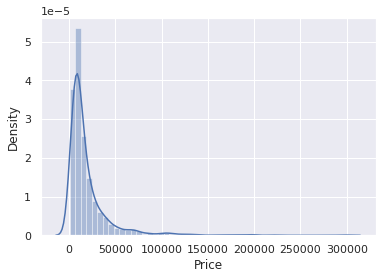

In [ ]:
sns.distplot(data_no_mv['Price'])
plt.show()

In [ ]:
q= data_no_mv['Price'].quantile(0.99) #..........
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


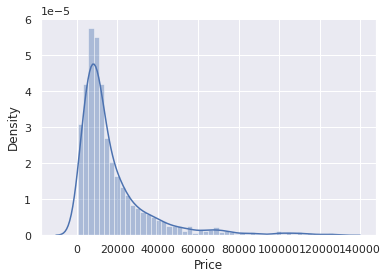

In [ ]:
sns.distplot(data_1['Price'])
plt.show()

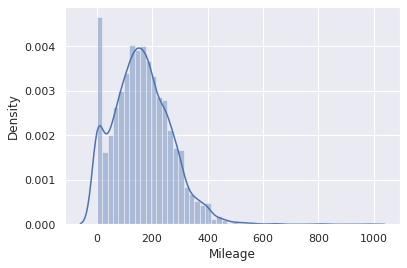

In [ ]:
sns.distplot(data_no_mv['Mileage'])
plt.show()

In [ ]:
q= data_no_mv['Mileage'].quantile(0.99) #..........
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3943.000000,3943.000000,3943.000000,3943.000000
mean,17936.780614,161.414659,2.747497,2006.393102
std,19009.750360,95.940408,4.981033,6.593870
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21417.500000,230.000000,3.000000,2011.000000
max,129222.000000,433.000000,99.990000,2016.000000


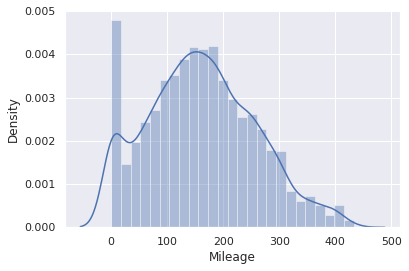

In [ ]:
sns.distplot(data_2['Mileage'])
plt.show()

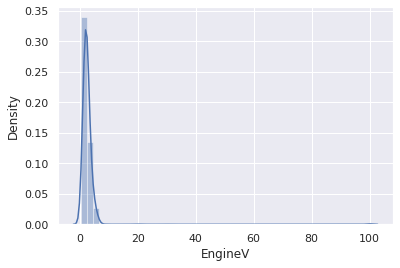

In [ ]:
sns.distplot(data_no_mv['EngineV'])
plt.show()

In [ ]:
data_3=data_2[data_2['EngineV'] < 6.5]

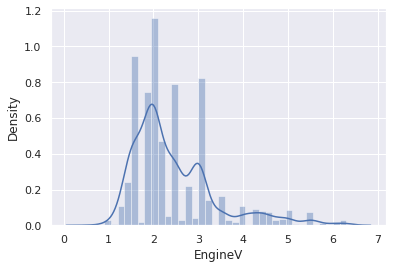

In [ ]:
sns.distplot(data_3['EngineV'])
plt.show()

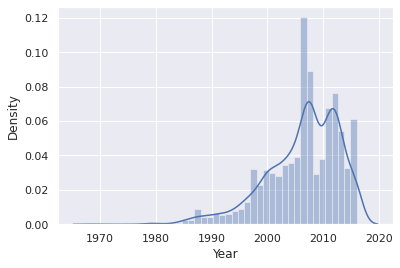

In [ ]:
sns.distplot(data_3['Year'])
plt.show()

In [ ]:
q=data_3['Year'].quantile(0.01) #As skewness is right side ,use 0.01
data_4=data_3[data_3['Year'] > q]
data_4.describe()


,Price,Mileage,EngineV,Year
count,3866.000000,3866.000000,3866.000000,3866.000000
mean,18197.480629,160.471547,2.450246,2006.713140
std,19087.396949,95.543697,0.949413,6.101235
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,433.000000,6.300000,2016.000000


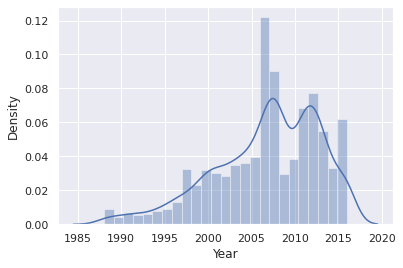

In [ ]:
sns.distplot(data_4['Year'])
plt.show()

In [ ]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [ ]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3866,3866.000000,3866,3866.000000,3866.000000,3866,3866,3866.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1466,NaN,NaN,1807,3504,NaN
mean,NaN,18197.480629,NaN,160.471547,2.450246,NaN,NaN,2006.713140
std,NaN,19087.396949,NaN,95.543697,0.949413,NaN,NaN,6.101235
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

In [ ]:
#Plotting all independent variables against out dependent varibale "Price" (For checking the relationship bteween independent & dependent varibles, scatter plot is used)

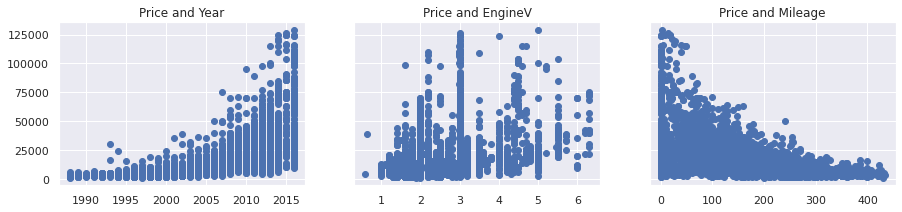

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey = True , figsize = (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

## Log Transformation

In [ ]:
# Log Trnasformation is normalizing skew data, it is used for dependent variables

In [ ]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']= log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


In [ ]:
#Plotting all independent variables against out dependent variable "log_price"

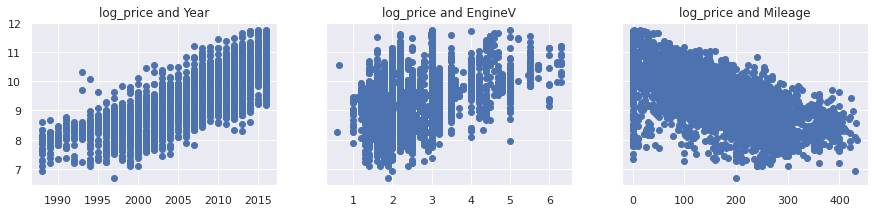

In [ ]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey = True , figsize = (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and EngineV')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')

plt.show()

In [ ]:
# Now above plots show the pettern is much more linear

In [ ]:
data_cleaned= data_cleaned.drop(['Price'], axis=1)

## Removing Multicolinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns


In [ ]:
vif

,VIF,features
0,3.794319,Mileage
1,10.360888,Year
2,7.660317,EngineV


In [ ]:
#From the VIF data frame,We can observe  that the variable "Year" has high multicolinearity shape.We shall drop this

In [ ]:
data_no_multicolinearity= data_cleaned.drop(['Year'] , axis=1)

In [ ]:
data_no_multicolinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [ ]:
#Now our data is ready for analysis

## Creating dummies

In [ ]:
data_with_dummies=pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [ ]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
#Our data is now completely numerical as we have created dummies for all the categorical data.now re-arrange to make our data frame a bit tidy

In [ ]:
data_with_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [ ]:
cols=['log_price','Mileage', 'EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']

In [ ]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Downloading Preprocessed Data

In [ ]:
data_preprocessed.to_csv('data_preprocessed.csv')
data_preprocessed=pd.read_csv('data_preprocessed.csv')


## Linear Regression Model

In [ ]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

## Scaling the Data

In [ ]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler


In [ ]:
scalar=StandardScaler()
scalar.fit(inputs)

StandardScaler()

StandardScaler()

In [ ]:
input_scaled=scalar.transform(inputs)

## Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(input_scaled,targets, test_size=0.25,random_state=365)

In [ ]:
x_train

array([[-1.34406430e-03,  1.41612724e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.50131983e+00,  2.56758184e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 6.98465416e-01,  1.93160124e+00, -5.79639358e-01, ...,
        -1.62113726e-01, -7.50101044e-01, -3.11119881e+00],
       ...,
       [-1.01387251e+00,  6.44065640e-01,  3.21266937e+00, ...,
        -1.62113726e-01,  1.33315372e+00,  3.21419511e-01],
       [ 7.23554617e-01, -1.29247164e+00,  5.79121641e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01],
       [ 1.55329031e+00,  8.53421022e-01, -2.63613631e-01, ...,
        -1.62113726e-01, -7.50101044e-01,  3.21419511e-01]])

In [ ]:
y_train

1931     9.341369
3608     9.464983
2712     8.318742
1229     9.449357
1734    10.273325
          ...    
428     11.074421
859     10.434116
801      9.928180
2740    10.609057
3666     8.824678
Name: log_price, Length: 2899, dtype: float64

## Creating the Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)



LinearRegression()

In [ ]:
yhat=reg.predict(x_train)

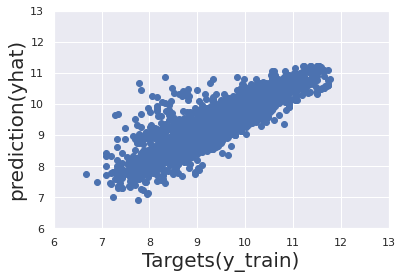

In [ ]:
plt.scatter(y_train,yhat)
plt.xlabel('Targets(y_train)',fontsize=20)
plt.ylabel('prediction(yhat)',fontsize=20)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [ ]:
#Above plot is optimized

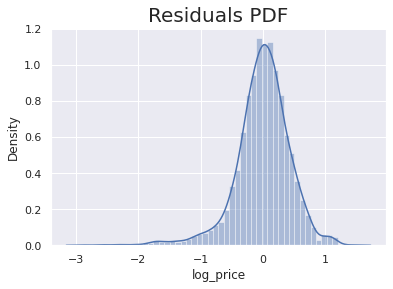

In [ ]:
sns.distplot(y_train - yhat)
plt.title("Residuals PDF",size = 20)
plt.show()